In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [2]:
# Read Images 
img = mpimg.imread('myface.jpg') 
img2 = mpimg.imread('mario.jpg')
img3 = mpimg.imread('tiger.jpg')
img4 = mpimg.imread('rainbow.jpg')

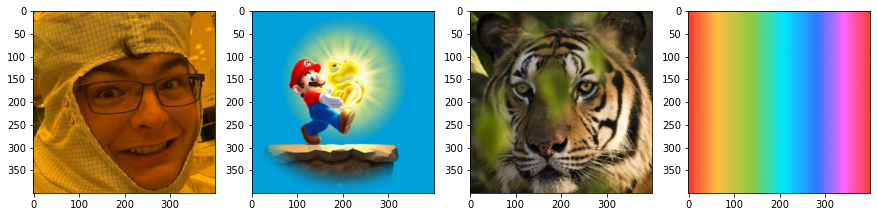

In [3]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize=(15,15))
ax1.imshow(img)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
plt.show()

In [4]:
img2.shape

(400, 400, 3)

In [5]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def cmap_gen(high, low="#000000",n=255):
    colors = []
    for i in range(0,n):
        colors.append(colorFader(low,high,i/n))
    return ListedColormap(colors)

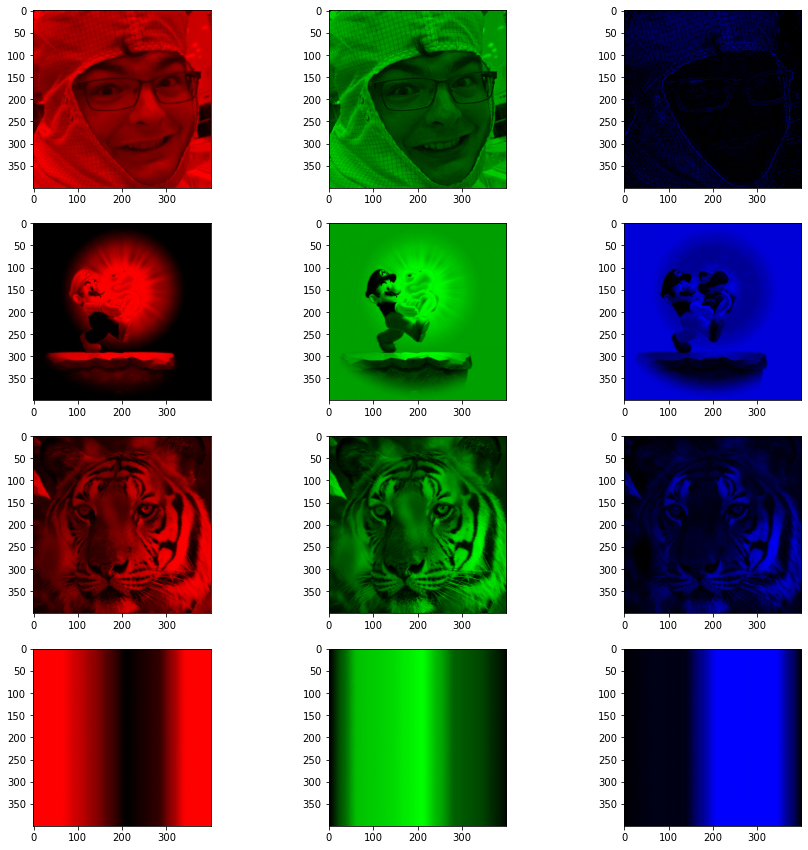

In [6]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4, 3, figsize=(15,15))

ax1.imshow(img[::,::,0], cmap = cmap_gen("#ff0000")); # Red
ax2.imshow(img[::,::,1], cmap = cmap_gen("#00ff00")); # Green
ax3.imshow(img[::,::,2], cmap = cmap_gen("#0000ff")); # Blue

ax4.imshow(img2[::,::,0], cmap = cmap_gen("#ff0000")); # Red
ax5.imshow(img2[::,::,1], cmap = cmap_gen("#00ff00")); # Green
ax6.imshow(img2[::,::,2], cmap = cmap_gen("#0000ff")); # Blue

ax7.imshow(img3[::,::,0], cmap = cmap_gen("#ff0000")); # Red
ax8.imshow(img3[::,::,1], cmap = cmap_gen("#00ff00")); # Green
ax9.imshow(img3[::,::,2], cmap = cmap_gen("#0000ff")); # Blue

ax10.imshow(img4[::,::,0], cmap = cmap_gen("#ff0000")); # Red
ax11.imshow(img4[::,::,1], cmap = cmap_gen("#00ff00")); # Green
ax12.imshow(img4[::,::,2], cmap = cmap_gen("#0000ff")); # Blue
plt.show()

In [7]:
# Finding the 1D shape of our new array

dims = 1
for i in img.shape:
    dims *= i
dims

480000

In [8]:
img_reshaped = img.reshape(dims)
img_reshaped2 = img2.reshape(dims)
img_reshaped3 = img3.reshape(dims)
img_reshaped4 = img4.reshape(dims)
img_reshaped

array([120,  61,  17, ..., 213, 132,   0], dtype=uint8)

In [9]:
df = pd.DataFrame()
df = df.append(pd.DataFrame(img_reshaped).T)
df = df.append(pd.DataFrame(img_reshaped2).T)
df = df.append(pd.DataFrame(img_reshaped3).T)
df = df.append(pd.DataFrame(img_reshaped4).T)
df

,0,1,2,3,4,5,6,7,8,9,...,479990,479991,479992,479993,479994,479995,479996,479997,479998,479999
0,120,61,17,117,56,12,113,51,4,125,...,0,212,131,0,214,133,0,213,132,0
0,0,161,218,0,161,218,0,161,218,0,...,218,0,160,218,0,160,218,0,160,218
0,64,73,28,59,68,25,53,59,21,45,...,20,113,69,24,110,66,21,106,62,15
0,254,55,48,254,55,48,255,56,49,255,...,61,255,60,56,255,60,54,255,59,51


In [10]:
test = df.mean(axis = 0)

In [11]:
merged = np.array(test).reshape((400,400,-3))

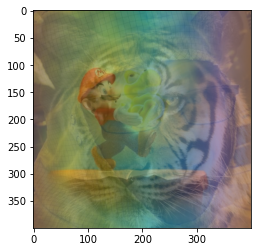

In [12]:
plt.imshow(merged.round()/df.values.max());